::: {.callout-note collapse="false"}
## Learning Outcomes
* Apply the `sklearn` library for model creation and training
* Recognize the value of feature engineering as a tool to improve model performance
* Implement polynomial feature generation and one hot encoding
* Understand the interactions between model complexity, model variance, and training error
:::

At this point, we've grown quite familiar with the modeling process. We've introduced the concept of loss, used it to fit several types of models, and, most recently, extended our analysis to multiple regression. Along the way, we've forged our way through the mathematics of deriving the optimal model parameters in all its gory detail. It's time to make our lives a little easier – let's implement the modeling process in code!

In this lecture, we'll explore two techniques for model fitting:

1. Translating our derived formulas for regression to `python`
2. Using `python`'s `sklearn` package

With our new programming frameworks in hand, we will also add sophistication to our models by introducing more complex features to enhance model performance. 

## Implementing Derived Formulas in Code

Throughout this lecture, we'll refer to the `penguins` dataset. 

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np

penguins = sns.load_dataset("penguins")
penguins = penguins[penguins["species"] == "Adelie"].dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Our goal will be to predict the value of the `"bill_depth_mm"` for a particular penguin given its `"flipper_length_mm"` and `"body_mass_g"`. We'll also add a bias column of all ones to represent the intercept term of our models.

In [13]:
# Add a bias column of all ones to `penguins`
penguins["bias"] = np.ones(len(penguins), dtype=int) 

# Define the design matrix, X...
X = penguins[["bias", "flipper_length_mm", "body_mass_g"]].to_numpy()

# ...as well as the target variable, y
Y = penguins[["bill_depth_mm"]].to_numpy()
# Converting X and Y to NumPy arrays avoids misinterpretation of column labels

In the lecture on ordinary least squares, we expressed multiple linear regression using matrix notation.

$$\hat{\mathbb{Y}} = \mathbb{X}\theta$$

We used a geometric approach to derive the following expression for the optimal model parameters:

$$\hat{\theta} = (\mathbb{X}^T \mathbb{X})^{-1}\mathbb{X}^T \mathbb{Y}$$

That's a whole lot of matrix manipulation. How do we implement it in `python`?

There are three operations we need to perform here: multiplying matrices, taking transposes, and finding inverses. 

* To perform matrix multiplication, use the `@` operator
* To take a transpose, call the `.T` attribute of an `NumPy` array or `DataFrame`
* To compute an inverse, use `NumPy`'s in-built method `np.linalg.inv`

Putting this all together, we can compute the OLS estimate for the optimal model parameters, stored in the array `theta_hat`.

In [14]:
#| code-fold: false
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
theta_hat

array([[1.10029953e+01],
       [9.82848689e-03],
       [1.47749591e-03]])

To make predictions using our optimized parameter values, we matrix-multiply the design matrix with the parameter vector:

$$\hat{\mathbb{Y}} = \mathbb{X}\theta$$

In [15]:
#| code-fold: false
y_hat = X @ theta_hat
pd.DataFrame(y_hat).head()

,0
0,18.322561
1,18.445578
2,17.721412
3,17.997254
4,18.263268


## `sklearn`
We've already saved a lot of time (and avoided tedious calculations) by translating our derived formulas into code. However, we still had to go through the process of writing out the linear algebra ourselves. 

To make life *even easier*, we can turn to the `sklearn` [`python` library](https://scikit-learn.org/stable/). `sklearn` is a robust library of machine learning tools used extensively in research and industry. It gives us a wide variety of in-built modeling frameworks and methods, so we'll keep returning to `sklearn` techniques as we progress through Data 100. 

Regardless of the specific type of model being implemented, `sklearn` follows a standard set of steps for creating a model. 

1. Create a model object. This generates a new instance of the model class. You can think of it as making a new "copy" of a standard "template" for a model. In code, this looks like:

    ```
    my_model = ModelClass()
    
    ```

    
2. Fit the model to the `X` design matrix and `Y` target vector. This calculates the optimal model parameters "behind the scenes" without us explicitly working through the calculations ourselves. The fitted parameters are then stored within the model for use in future predictions:

    ```
    my_model.fit(X, Y)

     ```

    
4. Use the fitted model to make predictions on the `X` input data using `.predict`. 

    ```
    my_model.predict(X)
    
    ```

To extract the fitted parameters, we can use:

  ```
  my_model.coef_

  my_model.intercept_

  ```


Let's put this into action with our multiple regression task. 

**1. Initialize an instance of the model class**

`sklearn` stores "templates" of useful models for machine learning. We begin the modeling process by making a "copy" of one of these templates for our own use. Model initialization looks like `ModelClass()`, where `ModelClass` is the type of model we wish to create.

For now, let's create a linear regression model using `LinearRegression()`. 

`my_model` is now an instance of the `LinearRegression` class. You can think of it as the "idea" of a linear regression model. We haven't trained it yet, so it doesn't know any model parameters and cannot be used to make predictions. In fact, we haven't even told it what data to use for modeling! It simply waits for further instructions.

In [16]:
import sklearn.linear_model as lm

my_model = lm.LinearRegression()

**2. Train the model using `.fit`**

Before the model can make predictions, we will need to fit it to our training data. When we fit the model, `sklearn` will run gradient descent behind the scenes to determine the optimal model parameters. It will then save these model parameters to our model instance for future use. 

All `sklearn` model classes include a `.fit` method, which is used to fit the model. It takes in two inputs: the design matrix, `X`, and the target variable, `Y`. 

Let's start by fitting a model with just one feature: the flipper length. We create a design matrix `X` by pulling out the `"flipper_length_mm"` column from the `DataFrame`. 

In [17]:
# .fit expects a 2D data design matrix, so we use double brackets to extract a DataFrame
X = penguins[["flipper_length_mm"]]
Y = penguins["bill_depth_mm"]

my_model.fit(X, Y)

LinearRegression()

Notice that we use **double brackets** to extract this column. Why double brackets instead of just single brackets? The `.fit` method, by default, expects to receive **2-dimensional** data – some kind of data that includes both rows and columns. Writing `penguins["flipper_length_mm"]` would return a 1D `Series`, causing `sklearn` to error. We avoid this by writing `penguins[["flipper_length_mm"]]` to produce a 2D `DataFrame`. 

And in just three lines of code, our model has run gradient descent to determine the optimal model parameters! Our single-feature model takes the form:

$$\text{bill depth} = \theta_0 + \theta_1 \text{flipper length}$$

Note that `LinearRegression` will automatically include an intercept term. 

The fitted model parameters are stored as attributes of the model instance. `my_model.intercept_` will return the value of $\hat{\theta}_0$ as a scalar. `my_model.coef_` will return all values $\hat{\theta}_1, 
\hat{\theta}_1, ...$ in an array. Because our model only contains one feature, we see just the value of $\hat{\theta}_1$ in the cell below.

In [18]:
# The intercept term, theta_0
my_model.intercept_

7.29730589961231

In [19]:
# All parameters theta_1, ..., theta_p
my_model.coef_

array([0.05812622])

**3. Use the fitted model to make predictions**

Now that the model has been trained, we can use it to make predictions! To do so, we use the `.predict` method. `.predict` takes in one argument: the design matrix that should be used to generate predictions. To understand how the model performs on the training set, we would pass in the training data. Alternatively, to make predictions on unseen data, we would pass in a new dataset that wasn't used to train the model.

Below, we call `.predict` to generate model predictions on the original training data. As before, we use double brackets to ensure that we extract 2-dimensional data.

In [20]:
Y_hat_one_feature = my_model.predict(penguins[["flipper_length_mm"]])

print(f"The RMSE of the model is {np.sqrt(np.mean((Y-Y_hat_one_feature)**2))}")

The RMSE of the model is 1.154936309923901


What if we wanted a model with two features? 

$$\text{bill depth} = \theta_0 + \theta_1 \text{flipper length} + \theta_2 \text{body mass}$$

We repeat this three-step process by intializing a new model object, then calling `.fit` and `.predict` as before.

In [21]:
# Step 1: initialize LinearRegression model
two_feature_model = lm.LinearRegression()

# Step 2: fit the model
X_two_features = penguins[["flipper_length_mm", "body_mass_g"]]
Y = penguins["bill_depth_mm"]

two_feature_model.fit(X_two_features, Y)

# Step 3: make predictions
Y_hat_two_features = two_feature_model.predict(X_two_features)

print(f"The RMSE of the model is {np.sqrt(np.mean((Y-Y_hat_two_features)**2))}")

The RMSE of the model is 0.9881331104079043


We can also see that we obtain the same predictions using `sklearn` as we did when applying the ordinary least squares formula before! 

In [22]:
#| code-fold: true
pd.DataFrame({"Y_hat from OLS":np.squeeze(Y_hat), "Y_hat from sklearn":Y_hat_two_features}).head()

NameError: name 'Y_hat' is not defined

## Feature Engineering

At this point in the course, we've equipped ourselves with some powerful techniques to build and optimize models. We've explored how to develop models of multiple variables, as well as how to transform variables to help **linearize** a dataset and fit these models to maximize their performance.

All of this was done with one major caveat: the regression models we've worked with so far are all **linear in the input variables**. We've assumed that our predictions should be some combination of linear variables. While this works well in some cases, the real world isn't always so straightforward. We'll learn an important method to address this issue – feature engineering – and consider some new problems that can arise when we do so.

Feature engineering is the process of *transforming* raw features into *more informative features* that can be used in modeling or EDA tasks and improve model performance.

Feature engineering allows you to:

* Capture domain knowledge 
* Express non-linear relationships using linear models
* Use non-numeric features in models

## Feature Functions

A **feature function** describes the transformations we apply to raw features in a dataset to create a design matrix of transformed features. We typically denote the feature function as $\Phi$ (think to yourself: "phi"-ture function). When we apply the feature function to our original dataset $\mathbb{X}$, the result, $\Phi(\mathbb{X})$, is a transformed design matrix ready to be used in modeling. 

For example, we might design a feature function that computes the square of an existing feature and adds it to the design matrix. In this case, our existing matrix $[x]$ is transformed to $[x, x^2]$. Its *dimension* increases from 1 to 2. Often, the dimension of the *featurized* dataset increases as seen here.

<center><img src="images/phi.png" alt='phi' width='700'></center>

The new features introduced by the feature function can then be used in modeling. Often, we use the symbol $\phi_i$ to represent transformed features after feature engineering. 

$$\hat{y} = \theta_1 x + \theta_2 x^2$$
$$\hat{y}= \theta_1 \phi_1 + \theta_2 \phi_2$$

In matrix notation, the symbol $\Phi$ is sometimes used to denote the design matrix after feature engineering has been performed. Note that in the usage below, $\Phi$ is now a feature-engineered matrix, rather than a function.

$$\hat{\mathbb{Y}} = \Phi \theta$$

More formally, we describe a feature function as transforming the original $\mathbb{R}^{n \times p}$ dataset $\mathbb{X}$ to a featurized $\mathbb{R}^{n \times p'}$ dataset $\mathbb{\Phi}$, where $p'$ is typically greater than $p$. 

$$\mathbb{X} \in \mathbb{R}^{n \times p} \longrightarrow \Phi \in \mathbb{R}^{n \times p'}$$

## One Hot Encoding
Feature engineering opens up a whole new set of possibilities for designing better-performing models. As you will see in lab and homework, feature engineering is one of the most important parts of the entire modeling process.

A particularly powerful use of feature engineering is to allow us to perform regression on *non-numeric* features. **One hot encoding** is a feature engineering technique that generates numeric features from categorical data, allowing us to use our usual methods to fit a regression model on the data. 

To illustrate how this works, we'll refer back to the `tips` dataset from previous lectures. Consider the `"day"` column of the dataset:

In [23]:
#| code-fold: true
import numpy as np
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


   At first glance, it doesn't seem possible to fit a regression model to this data – we can't directly perform any mathematical operations on the entry "Sun". 
  
To resolve this, we instead create a new table with a feature for each unique value in the original `"day"` column. We then iterate through the `"day"` column. For each entry in `"day"` we fill the corresponding feature in the new table with 1. All other features are set to 0.

<center><img src="images/ohe.png" alt='ohe' width='600'></center>

<br> 

The `OneHotEncoder` class of `sklearn` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.get_feature_names_out)) offers a quick way to perform this one-hot encoding. You will explore its use in detail in the lab. For now, recognize that we follow a very similar workflow to when we were working with the `LinearRegression` class: we initialize a `OneHotEncoder` object, fit it to our data, then use `.transform` to apply the fitted encoder.

In [24]:
#| code-fold: false
from sklearn.preprocessing import OneHotEncoder

# Initialize a OneHotEncoder object
ohe = OneHotEncoder()

# Fit the encoder
ohe.fit(tips[["day"]])

# Use the encoder to transform the raw "day" feature
encoded_day = ohe.transform(tips[["day"]]).toarray()
encoded_day_df = pd.DataFrame(encoded_day, columns=ohe.get_feature_names_out())

encoded_day_df.head()

,day_Fri,day_Sat,day_Sun,day_Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


The one-hot encoded features can then be used in the design matrix to train a model:

<center><img src="images/ohemodel.png" alt='ohemodel' width='600'></center>

$$\hat{y} = \theta_1 (\text{total}\textunderscore\text{bill}) + \theta_2 (\text{size}) + \theta_3 (\text{day}\textunderscore\text{Fri}) + \theta_4 (\text{day}\textunderscore\text{Sat}) + \theta_5 (\text{day}\textunderscore\text{Sun}) + \theta_6 (\text{day}\textunderscore\text{Thur})$$

Or in shorthand:

$$\hat{y} = \theta_1\phi_1 + \theta_2\phi_2 + \theta_3\phi_3 + \theta_4\phi_4 + \theta_5\phi_5 + \theta_6\phi_6$$

Now, the `day` feature (or rather, the four new boolean features that represent day) can be used to fit a model.

Using `sklearn` to fit the new model, we can determine the model coefficients, allowing us to understand how each feature impacts the predicted tip.

In [25]:
from sklearn.linear_model import LinearRegression
data_w_ohe = tips[["total_bill", "size", "day"]].join(encoded_day_df).drop(columns = "day")
ohe_model = lm.LinearRegression(fit_intercept=False) #Tell sklearn to not add an additional bias column. Why?
ohe_model.fit(data_w_ohe, tips["tip"])

pd.DataFrame({"Feature":data_w_ohe.columns, "Model Coefficient":ohe_model.coef_})

,Feature,Model Coefficient
0,total_bill,0.092994
1,size,0.187132
2,day_Fri,0.745787
3,day_Sat,0.621129
4,day_Sun,0.732289
5,day_Thur,0.668294


For example, when looking at the coefficient for `day_Fri`, we can understand how much the fact that it is Friday impacts the predicted tip. 

When one-hot encoding, keep in mind that any set of one-hot encoded columns will always sum to a column of all ones, representing the bias column. More formally, the bias column is a linear combination of the OHE columns.

<center><img src="images/bias.png" alt='bias' width='600'></center>

We must be careful not to include this bias column in our design matrix. Otherwise, there will be linear dependence in the model, meaning $\mathbb{X}^T\mathbb{X}$ would no longer be invertible, and our OLS estimate $\hat{\theta} = (\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\mathbb{Y}$ fails.

To resolve this issue, we simply omit one of the one-hot encoded columns *or* do not include an intercept term. 

<center><img src="images/remove.png" alt='remove' width='600'></center>

Either approach works — we still retain the same information as the omitted column being a linear combination of the remaining columns.

## Polynomial Features

We have encountered a few cases now where models with linear features have performed poorly on datasets that show clear non-linear curvature. 

As an example, consider the `vehicles` dataset, which contains information about cars. Suppose we want to use the `hp` (horsepower) of a car to predict its `"mpg"` (gas mileage in miles per gallon). If we visualize the relationship between these two variables, we see a non-linear curvature. Fitting a linear model to these variables results in a high (poor) value of RMSE. 

$$\hat{y} = \theta_0 + \theta_1 (\text{hp})$$

MSE of model with (hp) feature: 23.943662938603108


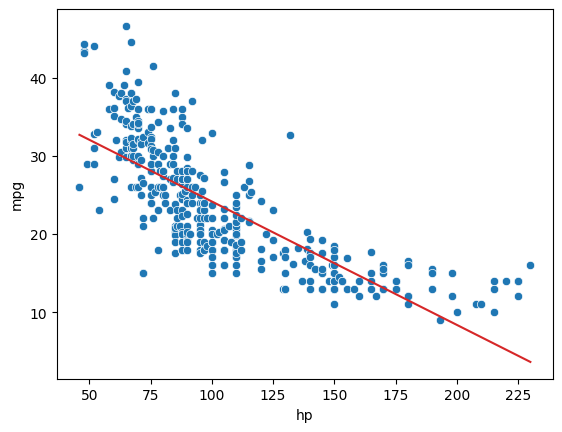

In [26]:
#| code-fold: true
pd.options.mode.chained_assignment = None 
vehicles = sns.load_dataset("mpg").dropna().rename(columns = {"horsepower": "hp"}).sort_values("hp")

X = vehicles[["hp"]]
Y = vehicles["mpg"]

hp_model = lm.LinearRegression()
hp_model.fit(X, Y)
hp_model_predictions = hp_model.predict(X)

import matplotlib.pyplot as plt

sns.scatterplot(data=vehicles, x="hp", y="mpg")
plt.plot(vehicles["hp"], hp_model_predictions, c="tab:red");

print(f"MSE of model with (hp) feature: {np.mean((Y-hp_model_predictions)**2)}")

To capture non-linearity in a dataset, it makes sense to incorporate **non-linear** features. Let's introduce a **polynomial** term, $\text{hp}^2$, into our regression model. The model now takes the form:

$$\hat{y} = \theta_0 + \theta_1 (\text{hp}) + \theta_2 (\text{hp}^2)$$
$$\hat{y} = \theta_0 + \theta_1 \phi_1 + \theta_2 \phi_2$$

How can we fit a model with non-linear features? We can use the exact same techniques as before: ordinary least squares, gradient descent, or `sklearn`. This is because our new model is still a **linear model**. Although it contains non-linear *features*, it is linear with respect to the model *parameters*. All of our previous work on fitting models was done under the assumption that we were working with linear models. Because our new model is still linear, we can apply our existing methods to determine the optimal parameters. 

MSE of model with (hp^2) feature: 18.98476890761722


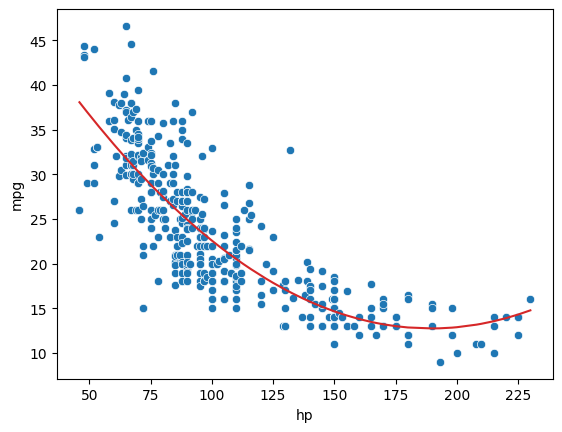

In [27]:
# Add a hp^2 feature to the design matrix
X = vehicles[["hp"]]
X["hp^2"] = vehicles["hp"]**2

# Use sklearn to fit the model
hp2_model = lm.LinearRegression()
hp2_model.fit(X, Y)
hp2_model_predictions = hp2_model.predict(X)

sns.scatterplot(data=vehicles, x="hp", y="mpg")
plt.plot(vehicles["hp"], hp2_model_predictions, c="tab:red");

print(f"MSE of model with (hp^2) feature: {np.mean((Y-hp2_model_predictions)**2)}")

Looking a lot better! By incorporating a squared feature, we are able to capture the curvature of the dataset. Our model is now a parabola centered on our data. Notice that our new model's error has decreased relative to the original model with linear features. .

## Complexity and Overfitting

We've seen now that feature engineering allows us to build all sorts of features to improve the performance of the model. In particular, we saw that designing a more complex feature (squaring `hp` in the `vehicles` data previously) substantially improved the model's ability to capture non-linear relationships. To take full advantage of this, we might be inclined to design increasingly complex features. Consider the following three models, each of different order (the maximum exponent power of each model):

* Model with order 2: $\hat{\text{mpg}} = \theta_0 + \theta_1 (\text{hp}) + \theta_2 (\text{hp}^2)$
* Model with order 3: $\hat{\text{mpg}} = \theta_0 + \theta_1 (\text{hp}) + \theta_2 (\text{hp}^2) + \theta_3 (\text{hp}^3)$
* Model with order 4: $\hat{\text{mpg}} = \theta_0 + \theta_1 (\text{hp}) + \theta_2 (\text{hp}^2) + \theta_3 (\text{hp}^3) + \theta_4 (\text{hp}^4)$

<br/>

<center><img src="images/degree_comparison.png" alt='degree_comparison' width='900'></center>

As we can see in the plots above, MSE continues to decrease with each additional polynomial term. To visualize it further, let's plot models as the complexity increases from 0 to 6: 

<center><img src="images/degree_comparison2.png" alt='degree_comparison' width='900'></center>

When we use our model to make predictions on the same data that was used to fit the model, we find that the MSE decreases with each additional polynomial term (as our model gets more complex). The **training error** is the model's error when generating predictions from the same data that was used for training purposes. We can conclude that the training error goes down as the complexity of the model increases. 

<center><img src="images/train_error.png" alt='train_error' width='400'></center>

This seems like good news – when working on the **training data**, we can improve model performance by designing increasingly complex models. 

>**Math Fact**: given $N$ overlapping data points, we can always find a polynomial of degree $N-1$ that goes through all those points.
> 
> For example: there always exists a degree-4 polynomial curve that can perfectly model a dataset of 5 datapoints
> <center><img src="images/perfect_poly_fits.png" alt='train_error' width='600'></center>


However, high model complexity comes with its own set of issues. When building the `vehicles` models above, we trained the models on the *entire* dataset and then evaluated their performance on this same dataset. In reality, we are likely to instead train the model on a *sample* from the population, then use it to make predictions on data it didn't encounter during training. 

Let's walk through a more realistic example. Say we are given a training dataset of just 6 datapoints and want to train a model to then make predictions on a *different* set of points. We may be tempted to make a highly complex model (e.g., degree 5), especially given it makes perfect predictions on the training data as clear on the left. However, as shown in the graph on the right, this model would perform *horribly* on the rest of the population! 

<center><img src="images/complex.png" alt='complex' width='600'></center>

The phenomenon above is called **overfitting**. The model effectively just memorized the training data it encountered when it was fitted, leaving it unable to **generalize** well to data it didn't encounter during training.

Additionally, since complex models are sensitive to the specific dataset used to train them, they have high **variance**. A model with high variance tends to *vary* more dramatically when trained on different datasets. Going back to our example above, we can see our degree-5 model varies erratically when we fit it to different samples of 6 points from `vehicles`. 

<center><img src="images/resamples.png" alt='resamples' width='800'></center>

We now face a dilemma: we know that we can **decrease training error** by increasing model complexity, but models that are *too* complex start to overfit and can't be reapplied to new datasets due to **high variance**.

<center><img src="images/bvt.png" alt='bvt' width='400'></center>

We can see that there is a clear trade-off that comes from the complexity of our model. As model complexity increases, the model's error on the training data decreases. At the same time, the model's variance tends to increase.

The takeaway here: we need to strike a balance in the complexity of our models; we want models that are generalizable to "unseen" data. A model that is too simple won't be able to capture the key relationships between our variables of interest; a model that is too complex runs the risk of overfitting. 

This begs the question: how do we control the complexity of a model? Stay tuned for our Lecture 16 on Cross-Validation and Regularization!